## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Inspection & Preparation

In [2]:
data = pd.read_csv("day.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
data.shape

(730, 16)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Inference :**
- There are no null values found in the data set

In [7]:
df = data.copy()
df.drop("instant", axis =1, inplace = True)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
df["dteday"] = pd.to_datetime(df["dteday"])

In [9]:
for i in df.columns:
    print(df[i].value_counts())

2018-01-01    1
2019-04-25    1
2019-04-27    1
2019-04-28    1
2019-04-29    1
             ..
2018-03-09    1
2018-04-09    1
2018-05-09    1
2018-06-09    1
2019-12-31    1
Name: dteday, Length: 730, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
1    463
2    246
3     21
Name: weathersit, dtype: int64
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64
32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30

**Inference:**
- No abrupt or out of range values found in any column
- Some of the categorical variables are typecasted as integer and float variables. Hence we have to fix them.

In [10]:
df["season"] = df["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
df["weathersit"] = df["weathersit"].map({1 : "Clear", 2 : "Mist", 3 : "Light_Snow", 4 : "Heavy_Rain"})

In [11]:
cols = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]

for i in cols:
    print(df[i].value_counts())

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
0    365
1    365
Name: yr, dtype: int64
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: mnth, dtype: int64
0    709
1     21
Name: holiday, dtype: int64
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: weekday, dtype: int64
1    504
0    226
Name: workingday, dtype: int64
Clear         463
Mist          246
Light_Snow     21
Name: weathersit, dtype: int64


In [12]:
cat_columns = ["season", "mnth", "weekday", "weathersit"]

for i in cat_columns:
    df[i] = df[i].astype("category")  

In [13]:
print(df.casual.sum())
print(df.registered.sum())

619952
2670893


#### Creating a derived variable `cas_reg_ratio` from casual & registered count

In [14]:
df["cas_reg_ratio"] = np.round(df["casual"] / df["registered"], 4)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,cas_reg_ratio
0,2018-01-01,spring,0,1,0,1,1,Mist,14.110847,18.18125,80.5833,10.749882,331,654,985,0.5061
1,2018-02-01,spring,0,1,0,2,1,Mist,14.902598,17.68695,69.6087,16.652113,131,670,801,0.1955
2,2018-03-01,spring,0,1,0,3,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0.0976
3,2018-04-01,spring,0,1,0,4,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0.0743
4,2018-05-01,spring,0,1,0,5,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0.0540


## EDA and Data Visualization

#### Pairwise Plot to check Linear Relationship

<Figure size 432x288 with 0 Axes>

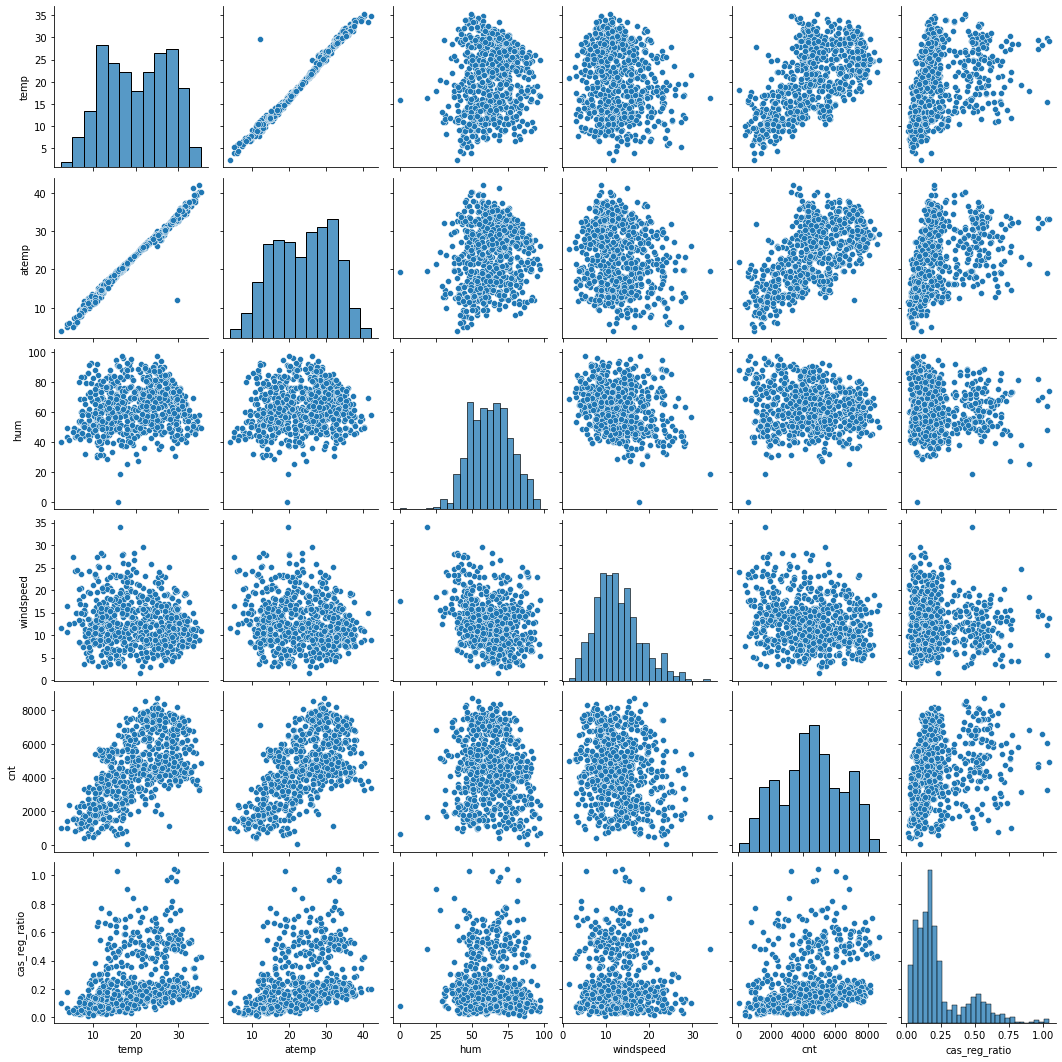

In [15]:
plt.figure()
sns.pairplot(df[["temp", "atemp", "hum", "windspeed", "cnt", "cas_reg_ratio"]])
plt.show()

#### Correlation Matrix - Heatmap

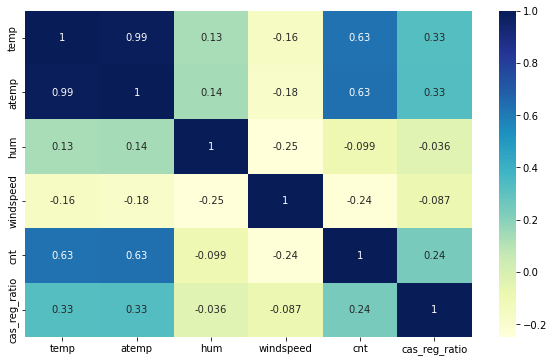

In [16]:
plt.figure(figsize = (10,6))
sns.heatmap(df[["temp", "atemp", "hum", "windspeed", "cnt", "cas_reg_ratio"]].corr(), annot = True, cmap = "YlGnBu")
plt.show()

**Inference:**
- Features **atemp** and **temp** are highly correlated with each other
- Fetaures **hum** and **windspeed** are negatively correlated with the targeted variable **cnt**

#### Scatter plot - to detect any linear trend

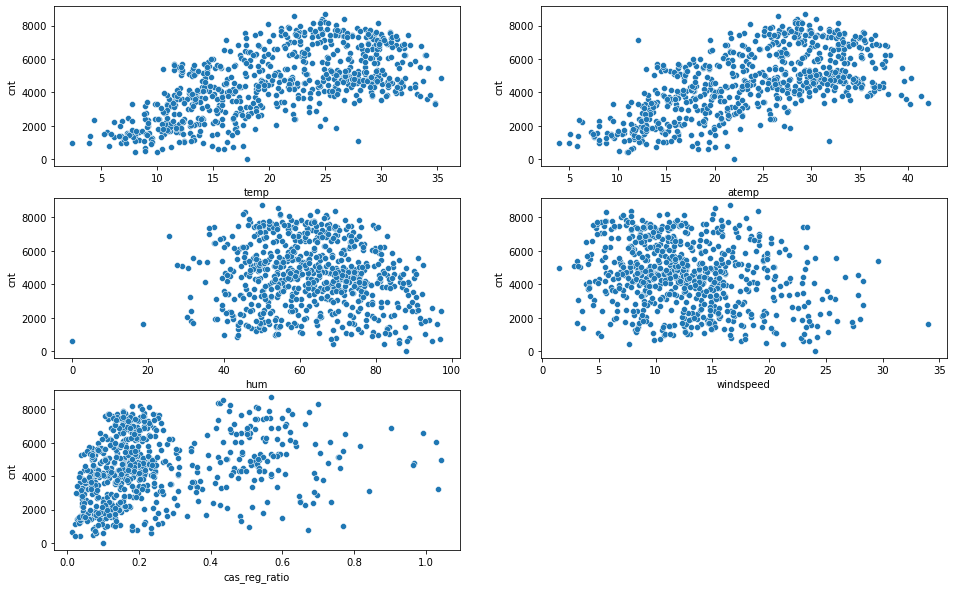

In [17]:
plt.figure(figsize = (16,10))

plt.subplot(3,2,1)
sns.scatterplot(x = df["temp"], y = df["cnt"])

plt.subplot(3,2,2)
sns.scatterplot(x = df["atemp"], y = df["cnt"])

plt.subplot(3,2,3)
sns.scatterplot(x = df["hum"], y = df["cnt"])

plt.subplot(3,2,4)
sns.scatterplot(x = df["windspeed"], y = df["cnt"])

plt.subplot(3,2,5)
sns.scatterplot(x = df["cas_reg_ratio"], y = df["cnt"])

plt.show()

**Inference:**
- There is **linear relationship** found between the feature variables and the target variable
- **Positive correlation** is seen for **temp, atemp, cas_reg_ratio(Casual / Registered) and the target variable**
- **Negative correlation** is seen for **hum & windspeed and the target variable**

#### Boxplot to analyze the categorical variables

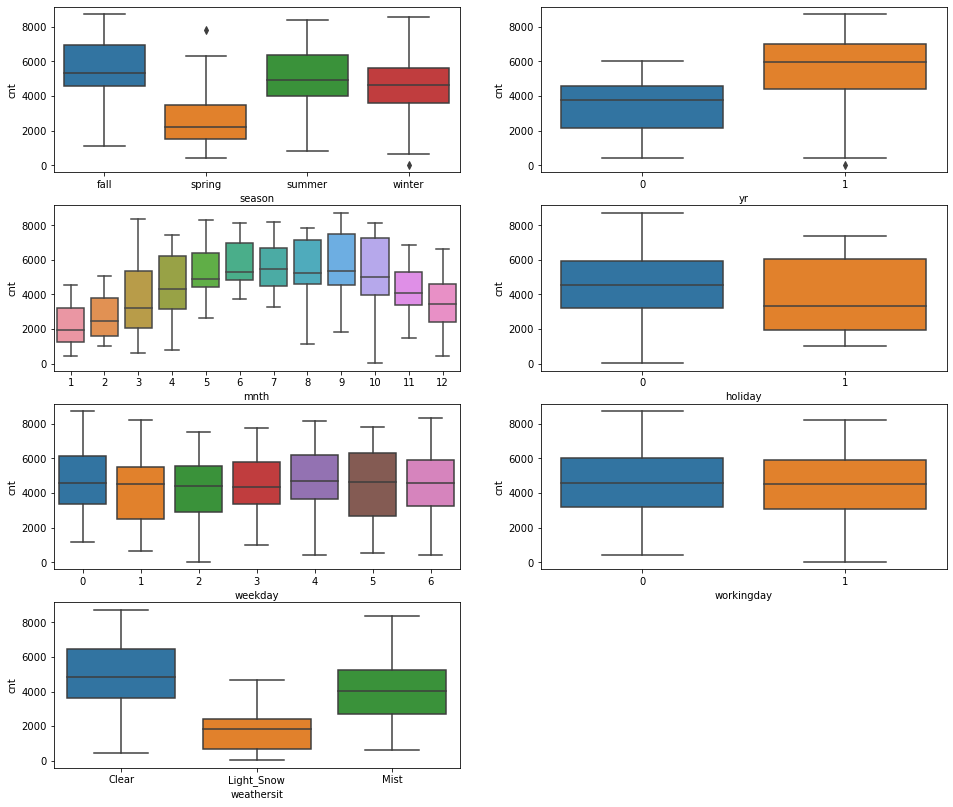

In [18]:
plt.figure(figsize = (16,14))

plt.subplot(4,2,1)
sns.boxplot(x = df["season"], y = df["cnt"])

plt.subplot(4,2,2)
sns.boxplot(x = df["yr"], y = df["cnt"])

plt.subplot(4,2,3)
sns.boxplot(x = df["mnth"], y = df["cnt"])

plt.subplot(4,2,4)
sns.boxplot(x = df["holiday"], y = df["cnt"])

plt.subplot(4,2,5)
sns.boxplot(x = df["weekday"], y = df["cnt"])

plt.subplot(4,2,6)
sns.boxplot(x = df["workingday"], y = df["cnt"])

plt.subplot(4,2,7)
sns.boxplot(x = df["weathersit"], y = df["cnt"])

plt.show()

**Inference**
- **Seasonal Pattern** - The number of users using bike rental is lower in spring compared to other seasons
- **Year Pattern** - Bike Rental Usage is higher in 2019 comaperd to 2018
- **Monthly Pattern** - There is considerable increase in bike rentals in the middle of the year (Months - May to October)
- **Non-holiday** days has slightly higher bike rental usage
- **Weathersit** pertaining to **Light_Snow** shows the lowest bike rental count compared to other categories within the feature
- Weekdays and Working Days is not showing any incraese/decrease pattern w.r.t Bike Rental Usage
- No **potential outliers** detected in any features.

#### Distribution plot on the Target Variable

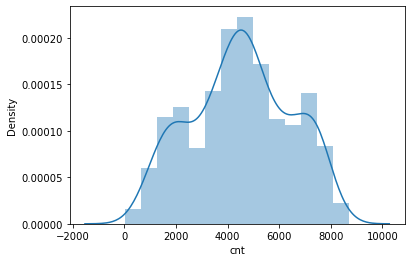

In [19]:
plt.figure()
sns.distplot(df["cnt"])
plt.show()

**Inference**
- The target variable cnt is not uniformly distributed

#### Dummy Variable Creation for Categorical Variables

In [20]:
dummy_var = pd.get_dummies(df[["season", "mnth", "weekday", "weathersit"]], drop_first = True)
df = pd.concat([df,dummy_var], axis = 1)

In [21]:
df.drop(['dteday', 'season', 'mnth', 'weekday','weathersit', 'casual', 'registered'], axis = 1, inplace = True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_reg_ratio,season_spring,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0.5061,1,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0.1955,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0.0976,1,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0.0743,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0.0540,1,...,0,0,0,0,0,0,1,0,0,0


## Model Building

#### Splitting the dataset into Train & Test Split

In [22]:
df_train, df_test = train_test_split(df, train_size = 0.75, test_size = 0.25, random_state = 100)
print(df_train.shape)
print(df_test.shape)

(547, 31)
(183, 31)


#### Feature Scaling on T'rain Data

In [23]:
num_vars = ["temp", "atemp", "hum", "windspeed", "cnt", "cas_reg_ratio"]

scaler = MinMaxScaler()

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [24]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_reg_ratio,season_spring,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,...,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,0.508227,0.027422,0.718464,0.535543,0.511400,0.650673,0.319317,0.511382,0.217772,0.257770,...,0.082267,0.087751,0.151737,0.160878,0.144424,0.140768,0.144424,0.124314,0.027422,0.349177
std,0.500390,0.163460,0.450160,0.225446,0.211788,0.144515,0.169239,0.225008,0.184696,0.437807,...,0.275022,0.283192,0.359094,0.367754,0.351841,0.348100,0.351841,0.330242,0.163460,0.477146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336998,0.326287,0.538858,0.197844,0.350437,0.094187,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.535847,0.521862,0.655216,0.294101,0.514266,0.156687,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.753113,0.413761,0.682697,0.263948,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y_train = df_train.pop("cnt")
X_train = df_train

#### Linear Regression Model using RFE

In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('cas_reg_ratio', True, 1),
 ('season_spring', False, 4),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_2', False, 11),
 ('mnth_3', False, 8),
 ('mnth_4', False, 9),
 ('mnth_5', False, 7),
 ('mnth_6', False, 6),
 ('mnth_7', False, 10),
 ('mnth_8', True, 1),
 ('mnth_9', True, 1),
 ('mnth_10', False, 3),
 ('mnth_11', False, 14),
 ('mnth_12', False, 15),
 ('weekday_1', False, 12),
 ('weekday_2', False, 16),
 ('weekday_3', False, 2),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 13),
 ('weathersit_Light_Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [27]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'cas_reg_ratio', 'season_summer', 'season_winter', 'mnth_8', 'mnth_9',
       'weekday_4', 'weekday_5', 'weathersit_Light_Snow', 'weathersit_Mist'],
      dtype='object')

#### Model 1 - Using Statsmodels & Important Features derived from RFE

In [28]:
X_train_rfe = X_train[X_train.columns[rfe.support_]]
X_train_sm = sm.add_constant(X_train_rfe)
reg_1 = sm.OLS(y_train, X_train_sm).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     198.1
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          3.61e-206
Time:                        14:52:52   Log-Likelihood:                 556.17
No. Observations:                 547   AIC:                            -1080.
Df Residuals:                     531   BIC:                            -1011.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2265      0.027      8.529      0.000       0.174       0.279
yr                        0.2300      0.008     29.590      0.000       0.215       0.245
holiday                  -0.1406      0.025     -5.669      0.000      -0.189      -0.092
workingday               -0.0337      0.010     -3.437      0.001      -0.053      -0.014
temp                      0.5274      0.022     23.813      0.000       0.484       0.571
hum                      -0.1648      0.036     -4.562      0.000      -0.236      -0.094
windspeed                -0.1713      0.024     -7.030      0.000      -0.219      -0.123
cas_reg_ratio             0.0615      0.025      2.440      0.015       0.012       0.111
season_summer             0.1021      0.011      9.682      0.000       0.081       0.123
season_winter             0.1565      0.010     15.541      0.000       0.137       0.176
mnth_8                    0.0558      0.016      3.549      0.000       0.025       0.087
mnth_9                    0.1176      0.015      7.611      0.000       0.087       0.148
weekday_4                 0.0337      0.013      2.662      0.008       0.009       0.059
weekday_5                 0.0305      0.012      2.471      0.014       0.006       0.055
weathersit_Light_Snow    -0.2342      0.026     -9.023      0.000      -0.285      -0.183
weathersit_Mist          -0.0534      0.010     -5.313      0.000      -0.073      -0.034
==============================================================================
Omnibus:                       74.169   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.312
Skew:                          -0.769   Prob(JB):                     1.39e-33
Kurtosis:                       5.067   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking of VIF

In [29]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,16.28
3,temp,11.11
2,workingday,4.66
5,windspeed,3.68
6,cas_reg_ratio,3.51
14,weathersit_Mist,2.22
0,yr,2.03
7,season_summer,1.88
8,season_winter,1.72
9,mnth_8,1.59


**Inference**
- All the p-values looks to be significant
- Although the VIF of `hum` & `temp` are beyond acceptance (>5)

#### Model 2 : Removing variable `hum` due to high VIF

In [30]:
X_train_rfe = X_train_rfe.drop("hum", axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
reg_2 = sm.OLS(y_train, X_train_sm).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          6.44e-203
Time:                        14:52:52   Log-Likelihood:                 545.65
No. Observations:                 547   AIC:                            -1061.
Df Residuals:                     532   BIC:                            -996.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1331      0.017      7.728      0.000       0.099       0.167
yr                        0.2342      0.008     29.799      0.000       0.219       0.250
holiday                  -0.1446      0.025     -5.728      0.000      -0.194      -0.095
workingday               -0.0372      0.010     -3.743      0.000      -0.057      -0.018
temp                      0.5054      0.022     22.957      0.000       0.462       0.549
windspeed                -0.1400      0.024     -5.880      0.000      -0.187      -0.093
cas_reg_ratio             0.0683      0.026      2.666      0.008       0.018       0.119
season_summer             0.0998      0.011      9.302      0.000       0.079       0.121
season_winter             0.1480      0.010     14.685      0.000       0.128       0.168
mnth_8                    0.0547      0.016      3.416      0.001       0.023       0.086
mnth_9                    0.1117      0.016      7.122      0.000       0.081       0.143
weekday_4                 0.0365      0.013      2.834      0.005       0.011       0.062
weekday_5                 0.0320      0.013      2.543      0.011       0.007       0.057
weathersit_Light_Snow    -0.2779      0.025    -11.319      0.000      -0.326      -0.230
weathersit_Mist          -0.0796      0.008     -9.490      0.000      -0.096      -0.063
==============================================================================
Omnibus:                       71.422   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.495
Skew:                          -0.754   Prob(JB):                     1.88e-31
Kurtosis:                       4.984   Cond. No.                         12.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking of VIF

In [31]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.56
2,workingday,4.19
5,cas_reg_ratio,3.49
4,windspeed,3.38
0,yr,2.03
6,season_summer,1.88
8,mnth_8,1.58
10,weekday_4,1.56
7,season_winter,1.55
11,weekday_5,1.52


#### Model 3 : Removing variable `weekday_5` due to high p-value

In [32]:
X_train_rfe = X_train_rfe.drop("weekday_5", axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
reg_3 = sm.OLS(y_train, X_train_sm).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     216.1
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.05e-202
Time:                        14:52:52   Log-Likelihood:                 542.35
No. Observations:                 547   AIC:                            -1057.
Df Residuals:                     533   BIC:                            -996.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1351      0.017      7.812      0.000       0.101       0.169
yr                        0.2333      0.008     29.561      0.000       0.218       0.249
holiday                  -0.1384      0.025     -5.481      0.000      -0.188      -0.089
workingday               -0.0283      0.009     -3.029      0.003      -0.047      -0.010
temp                      0.5120      0.022     23.305      0.000       0.469       0.555
windspeed                -0.1417      0.024     -5.921      0.000      -0.189      -0.095
cas_reg_ratio             0.0454      0.024      1.885      0.060      -0.002       0.093
season_summer             0.1009      0.011      9.361      0.000       0.080       0.122
season_winter             0.1472      0.010     14.537      0.000       0.127       0.167
mnth_8                    0.0544      0.016      3.382      0.001       0.023       0.086
mnth_9                    0.1134      0.016      7.200      0.000       0.082       0.144
weekday_4                 0.0254      0.012      2.087      0.037       0.001       0.049
weathersit_Light_Snow    -0.2758      0.025    -11.180      0.000      -0.324      -0.227
weathersit_Mist          -0.0801      0.008     -9.502      0.000      -0.097      -0.064
==============================================================================
Omnibus:                       69.760   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              137.883
Skew:                          -0.739   Prob(JB):                     1.15e-30
Kurtosis:                       4.966   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking of VIF

In [33]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.33
2,workingday,3.55
4,windspeed,3.38
5,cas_reg_ratio,3.06
0,yr,2.02
6,season_summer,1.88
8,mnth_8,1.58
7,season_winter,1.54
12,weathersit_Mist,1.52
10,weekday_4,1.38


#### Model 4 : Removing variable `weekday_4` due to high p-value

In [34]:
X_train_rfe = X_train_rfe.drop("weekday_4", axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
reg_4 = sm.OLS(y_train, X_train_sm).fit()
reg_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     232.3
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          5.86e-203
Time:                        14:52:52   Log-Likelihood:                 540.13
No. Observations:                 547   AIC:                            -1054.
Df Residuals:                     534   BIC:                            -998.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1356      0.017      7.817      0.000       0.102       0.170
yr                        0.2330      0.008     29.443      0.000       0.217       0.249
holiday                  -0.1358      0.025     -5.366      0.000      -0.185      -0.086
workingday               -0.0232      0.009     -2.563      0.011      -0.041      -0.005
temp                      0.5182      0.022     23.731      0.000       0.475       0.561
windspeed                -0.1429      0.024     -5.957      0.000      -0.190      -0.096
cas_reg_ratio             0.0309      0.023      1.335      0.182      -0.015       0.076
season_summer             0.1025      0.011      9.507      0.000       0.081       0.124
season_winter             0.1469      0.010     14.461      0.000       0.127       0.167
mnth_8                    0.0541      0.016      3.351      0.001       0.022       0.086
mnth_9                    0.1137      0.016      7.195      0.000       0.083       0.145
weathersit_Light_Snow    -0.2811      0.025    -11.424      0.000      -0.329      -0.233
weathersit_Mist          -0.0815      0.008     -9.665      0.000      -0.098      -0.065
==============================================================================
Omnibus:                       69.678   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.500
Skew:                          -0.731   Prob(JB):                     3.10e-31
Kurtosis:                       5.006   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking of VIF

In [35]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.11
4,windspeed,3.38
2,workingday,3.25
5,cas_reg_ratio,2.81
0,yr,2.02
6,season_summer,1.87
8,mnth_8,1.58
7,season_winter,1.54
11,weathersit_Mist,1.51
9,mnth_9,1.32


#### Model 5 : Removing variable `cas_reg_ratio` due to high p-value

In [36]:
X_train_rfe = X_train_rfe.drop("cas_reg_ratio", axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
reg_5 = sm.OLS(y_train, X_train_sm).fit()
reg_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     252.8
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          8.73e-204
Time:                        14:52:52   Log-Likelihood:                 539.21
No. Observations:                 547   AIC:                            -1054.
Df Residuals:                     535   BIC:                            -1003.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1390      0.017      8.098      0.000       0.105       0.173
yr                        0.2317      0.008     29.487      0.000       0.216       0.247
holiday                  -0.1308      0.025     -5.223      0.000      -0.180      -0.082
workingday               -0.0229      0.009     -2.525      0.012      -0.041      -0.005
temp                      0.5258      0.021     24.918      0.000       0.484       0.567
windspeed                -0.1441      0.024     -6.005      0.000      -0.191      -0.097
season_summer             0.1042      0.011      9.731      0.000       0.083       0.125
season_winter             0.1468      0.010     14.440      0.000       0.127       0.167
mnth_8                    0.0537      0.016      3.327      0.001       0.022       0.085
mnth_9                    0.1142      0.016      7.226      0.000       0.083       0.145
weathersit_Light_Snow    -0.2848      0.024    -11.640      0.000      -0.333      -0.237
weathersit_Mist          -0.0826      0.008     -9.844      0.000      -0.099      -0.066
==============================================================================
Omnibus:                       65.376   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.559
Skew:                          -0.682   Prob(JB):                     3.66e-30
Kurtosis:                       5.022   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking of VIF

In [37]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,5.83
4,windspeed,3.37
2,workingday,3.22
0,yr,2.00
5,season_summer,1.84
7,mnth_8,1.58
6,season_winter,1.54
10,weathersit_Mist,1.51
8,mnth_9,1.32
1,holiday,1.09


#### Model 6 : Removing variable `workingday` due to high p-value

In [38]:
X_train_rfe = X_train_rfe.drop("workingday", axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
reg_6 = sm.OLS(y_train, X_train_sm).fit()
reg_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     274.7
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.21e-203
Time:                        14:52:52   Log-Likelihood:                 535.97
No. Observations:                 547   AIC:                            -1050.
Df Residuals:                     536   BIC:                            -1003.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1213      0.016      7.705      0.000       0.090       0.152
yr                        0.2317      0.008     29.342      0.000       0.216       0.247
holiday                  -0.1137      0.024     -4.691      0.000      -0.161      -0.066
temp                      0.5269      0.021     24.851      0.000       0.485       0.569
windspeed                -0.1434      0.024     -5.947      0.000      -0.191      -0.096
season_summer             0.1033      0.011      9.603      0.000       0.082       0.124
season_winter             0.1453      0.010     14.248      0.000       0.125       0.165
mnth_8                    0.0542      0.016      3.340      0.001       0.022       0.086
mnth_9                    0.1148      0.016      7.230      0.000       0.084       0.146
weathersit_Light_Snow    -0.2838      0.025    -11.543      0.000      -0.332      -0.236
weathersit_Mist          -0.0811      0.008     -9.645      0.000      -0.098      -0.065
==============================================================================
Omnibus:                       60.118   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.943
Skew:                          -0.616   Prob(JB):                     3.68e-29
Kurtosis:                       5.056   Cond. No.                         10.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking of VIF

In [39]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,3.08
0,yr,1.99
4,season_summer,1.84
6,mnth_8,1.58
9,weathersit_Mist,1.51
5,season_winter,1.49
7,mnth_9,1.32
8,weathersit_Light_Snow,1.08
1,holiday,1.04


#### Model 7 : Removing variable `windspeed` due to high VIF

In [40]:
X_train_rfe = X_train_rfe.drop("windspeed", axis = 1)
X_train_sm = sm.add_constant(X_train_rfe)
reg_7 = sm.OLS(y_train, X_train_sm).fit()
reg_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     283.2
Date:                Wed, 05 Jan 2022   Prob (F-statistic):          1.81e-197
Time:                        14:52:52   Log-Likelihood:                 518.50
No. Observations:                 547   AIC:                            -1017.
Df Residuals:                     537   BIC:                            -974.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0640      0.013      4.983      0.000       0.039       0.089
yr                        0.2305      0.008     28.305      0.000       0.214       0.246
holiday                  -0.1181      0.025     -4.729      0.000      -0.167      -0.069
temp                      0.5469      0.022     25.323      0.000       0.504       0.589
season_summer             0.0993      0.011      8.965      0.000       0.078       0.121
season_winter             0.1527      0.010     14.630      0.000       0.132       0.173
mnth_8                    0.0571      0.017      3.414      0.001       0.024       0.090
mnth_9                    0.1212      0.016      7.416      0.000       0.089       0.153
weathersit_Light_Snow    -0.2983      0.025    -11.820      0.000      -0.348      -0.249
weathersit_Mist          -0.0802      0.009     -9.239      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       66.024   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.668
Skew:                          -0.651   Prob(JB):                     7.06e-34
Kurtosis:                       5.236   Cond. No.                         9.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking of VIF

In [41]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.02
0,yr,1.93
3,season_summer,1.82
5,mnth_8,1.56
4,season_winter,1.47
8,weathersit_Mist,1.46
6,mnth_9,1.30
7,weathersit_Light_Snow,1.06
1,holiday,1.03


**Inference :**
- All the feauture variables included in the model have a p-value less than 0.05
- Also the Variance Infaltion Factor (VIF) for all the mentioned variables are low (<5) in this case

#### Checking for Residual Errors

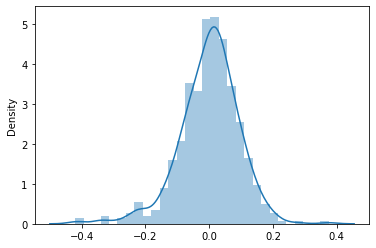

In [42]:
y_pred_train = reg_7.predict(X_train_sm)
sns.distplot(y_train - y_pred_train)
plt.show()

**Inference :**
- The error terms are uniformally distributed with mean at around 0.

#### Checking for Randomness in error terms

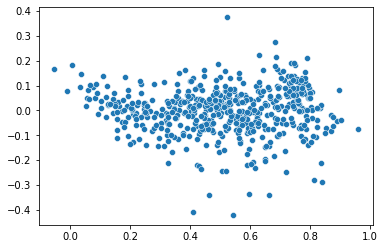

In [43]:
sns.scatterplot(x = y_pred_train, y = y_train - y_pred_train)
plt.show()

**Inference :**
- The error terms are also randomly distributed with no pattern 

**So reg_7 model can now be used to preict the unseen data to check how well the model has generalized on the test dataset (unseen data)**

## Making Predictions on the Test Set

#### Feature Scaling on Test Data

In [44]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [45]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,cas_reg_ratio,season_spring,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Light_Snow,weathersit_Mist
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,...,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,0.475410,0.032787,0.606557,0.568688,0.542076,0.635166,0.316439,0.530233,0.219135,0.213115,...,0.081967,0.076503,0.120219,0.092896,0.136612,0.147541,0.136612,0.196721,0.032787,0.300546
std,0.500765,0.178567,0.489854,0.234887,0.219336,0.152926,0.159371,0.215783,0.189250,0.410632,...,0.275067,0.266530,0.326109,0.291083,0.344380,0.355617,0.344380,0.398610,0.178567,0.459754
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.007193,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.362754,0.354867,0.522601,0.199183,0.393293,0.097978,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.575304,0.558309,0.618721,0.303464,0.533134,0.158729,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.774153,0.729061,0.735079,0.404383,0.681086,0.230365,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,0.987364,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [46]:
y_test = df_test.pop("cnt")
X_test = df_test

In [47]:
X_test_rfe = X_test[X_train_rfe.columns]
X_test_sm = sm.add_constant(X_test_rfe)
y_pred_test = reg_7.predict(X_test_sm)

#### Scatter plot of Actual Vs Predicted

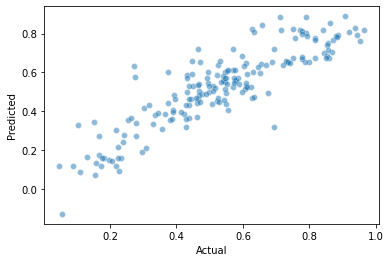

In [48]:
sns.scatterplot(x = y_test, y = y_pred_test, alpha = 0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

#### Results - R-squared

In [49]:
r2_train = r2_score(y_train, y_pred_train)
print("Train R-squared : ", np.round(r2_train,4))
r2_test = r2_score(y_test, y_pred_test)
print("Test R-squared : ", np.round(r2_test, 4))

Train R-squared :  0.826
Test R-squared :  0.7752


In [50]:
reg_7.params

const                    0.063962
yr                       0.230484
holiday                 -0.118132
temp                     0.546875
season_summer            0.099290
season_winter            0.152734
mnth_8                   0.057104
mnth_9                   0.121227
weathersit_Light_Snow   -0.298331
weathersit_Mist         -0.080155
dtype: float64

## Conclusion

#### 1. Final Equation:

**cnt** = `0.063962` + `0.230484` * **yr** - `0.118132` * **holiday** + `0.546875` * **temp** +  `0.099290` * **season_summer** + `0.152734` * **season_winter** + `0.057104` * **mnth_8** + `0.121227` * **mnth_9** - `0.298331` * **weathersit_Light_Snow** - `0.080155` * **weathersit_Mist**

#### 2. Important features derived from the final model
- **temp** with co-efficient of 0.546875.
    - A unit increase in temp variable can increase count of bike rentals by 0.54 units
- **weathersit_Light_Snow** with co-efficient of -0.298331.
    - A unit increase in weathersit_Light_Snow variable can decrease count of bike rentals by 0.29 units
- **yr** with co-efficient of 0.230484.
    - A unit increase in yr variable can increase count of bike rentals by 0.23 units
- **season_winter** with co-efficient of 0.152734.
    - A unit increase in season_winter variable can increase count of bike rentals by 0.15 units
- **holiday** with co-efficient of -0.118132.
    - A unit increase in holiday variable can decrease count of bike rentals by 0.11 units